In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


*   pandas digunakan untuk membuat data frame
*   matplotlib.pyplot dan seaborn digunakan untuk membuat plot

In [7]:
car = pd.read_csv('cardata.csv')

In [8]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


301 non-null means that there is no missing value since we have 301 entries.

# checking the number of missing values

In [57]:
car.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [58]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There is no missing value

In [59]:
car.shape

(301, 9)

In [60]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [61]:
car.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


The strongest correlation is between the variables Selling_Price and Present_Price, with a correlation value of 0.878983.

This correlation indicates a strong positive relationship between the selling price of the car and its present price. Therefore, when the present price of the car increases, the selling price of the car also tends to increase, and vice versa. This suggests a strong association between the selling price of a car and its present price.

# Splitting the data and Target

In [10]:
X = car.drop(['Car_Name','Selling_Price'],axis=1)
Y = car['Selling_Price']

In [11]:
print(X)

     Year  Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  Owner
0    2014           5.59       27000    Petrol      Dealer       Manual      0
1    2013           9.54       43000    Diesel      Dealer       Manual      0
2    2017           9.85        6900    Petrol      Dealer       Manual      0
3    2011           4.15        5200    Petrol      Dealer       Manual      0
4    2014           6.87       42450    Diesel      Dealer       Manual      0
..    ...            ...         ...       ...         ...          ...    ...
296  2016          11.60       33988    Diesel      Dealer       Manual      0
297  2015           5.90       60000    Petrol      Dealer       Manual      0
298  2009          11.00       87934    Petrol      Dealer       Manual      0
299  2017          12.50        9000    Diesel      Dealer       Manual      0
300  2016           5.90        5464    Petrol      Dealer       Manual      0

[301 rows x 7 columns]


In [13]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Splitting Training and Test data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.42, random_state=2)

# Check Outlier

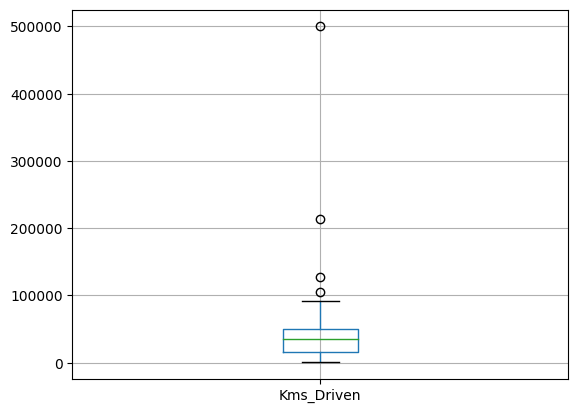

In [15]:
boxplot = X_train.boxplot(column=['Kms_Driven'])

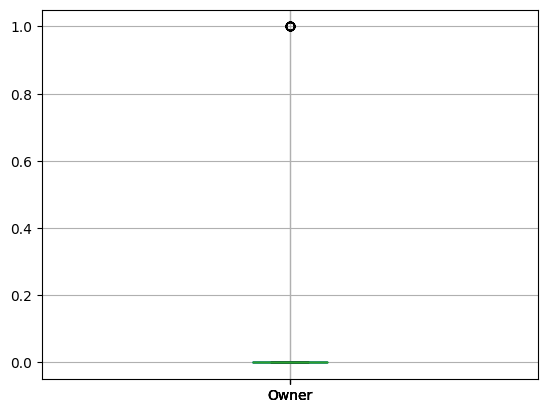

In [19]:
boxplot = X_train.boxplot(column=['Owner'])

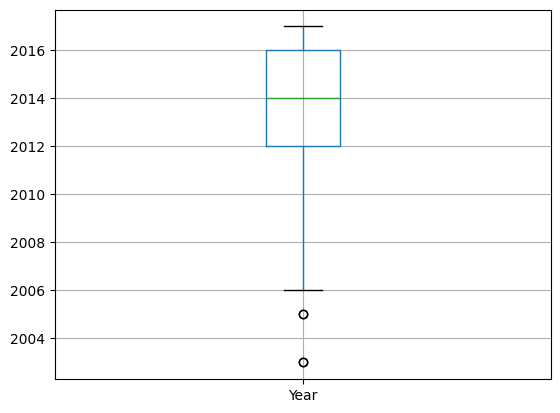

In [20]:
boxplot = X_train.boxplot(column=['Year'])

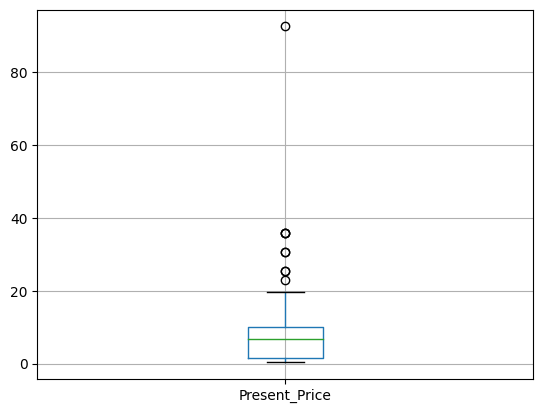

In [21]:
boxplot = X_train.boxplot(column=['Present_Price'])

# Encoding the Categorical Data

In [67]:
X_train.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [68]:
X_train.replace({'Fuel_Type':{'Petrol':2,'Diesel':0,'CNG':1}},inplace=True)

In [69]:
X_train.replace({'Seller_Type':{'Dealer':1,'Individual':0}},inplace=True)

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 226 to 168
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           174 non-null    int64  
 1   Present_Price  174 non-null    float64
 2   Kms_Driven     174 non-null    int64  
 3   Fuel_Type      174 non-null    int64  
 4   Seller_Type    174 non-null    int64  
 5   Transmission   174 non-null    int64  
 6   Owner          174 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 10.9 KB


In [71]:
X_test.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [72]:
X_test.replace({'Fuel_Type':{'Petrol':2,'Diesel':0,'CNG':1}},inplace=True)

In [73]:
X_test.replace({'Seller_Type':{'Dealer':1,'Individual':0}},inplace=True)

# Checking the distribution of categorical data

In [74]:
print(X_train.Fuel_Type.value_counts())
print(X_train.Transmission.value_counts())
print(X_train.Seller_Type.value_counts())

2    140
0     34
Name: Fuel_Type, dtype: int64
0    151
1     23
Name: Transmission, dtype: int64
1    119
0     55
Name: Seller_Type, dtype: int64


In [75]:
X_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
226,2015,5.70,24678,2,1,0,0
180,2012,0.51,60000,2,0,0,0
117,2015,1.90,14000,2,0,0,0
289,2016,13.60,10980,2,1,0,0
142,2015,0.84,29000,2,0,0,0


# Model Training

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Latih model menggunakan data latih
rf_regressor.fit(X_train, Y_train)

# Lakukan prediksi menggunakan data uji
predictions = rf_regressor.predict(X_test)

# Evaluasi performa model

mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 2.79626294874016
R-squared (R2): 0.8850268282704764


# Model Evaluation

In [125]:
#evaluasi train
predictions = rf_regressor.predict(X_train)
mse_train = mean_squared_error(Y_train, predictions)
r2_train = r2_score(Y_train, predictions)

print(f"Train MSE: {mse_train}")
print(f"Train R2: {r2_train}")


Train MSE: 0.643443327643678
Train R2: 0.9759107285284317


# Visualize the actual prices and Predicted prices

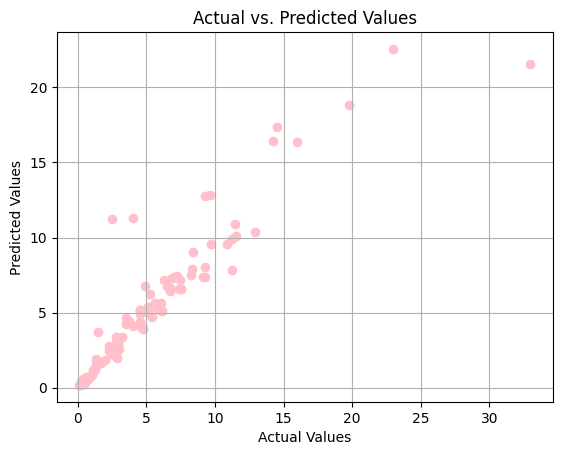

In [124]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, predictions, color='pink')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()